In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ydata_profiling import ProfileReport

df = pd.read_csv('WanderRush.csv')
df_modified=df.copy()

df_modified.drop(columns=['Marca temporal', '1.- Selecciona tu sexo'], inplace=True)

column_name = [
    "dedicación",
    "le_gusta_salir",
    "frecuencia_de_salida",
    "vistar_áreas_recreativas",
    "freciencia_de_visitas",
    "planear_ruta",
    "medio_de_transporte",
    "dificultad_de_llegar_al_destino",
    "compartir_su_experiencia",
    "busqueda_de_sitios",
    "red_social_más_usada",
    "encuentra_rápido_información",
    "encuentra_promociones",
    "lugares_ofrecen_información",
    "medio_compartir_experiencia",
    "le_gustaria_app",
    "como_compartir_experiencia",
    "pagar_para_acceder_lugares",
    "tipos_lugares",
    "rango_edad"

]
df_modified.columns = column_name


c:\Users\pukia\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


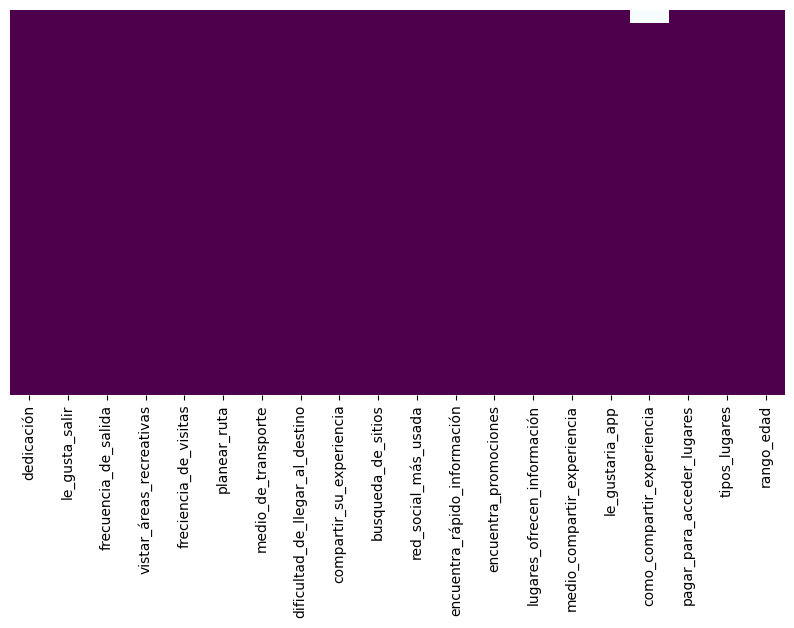

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

is_null = df_modified.isnull()

plt.figure(figsize=(10, 5))
sns.heatmap(is_null, cbar=False, cmap='BuPu_r', yticklabels=False)
plt.show()

In [47]:

frequency_likes = {
    'mucho': 5,
    'a veces': 4,
    'no tanto': 3,
    'poco': 2,
    'muy poco': 1
}

plan_route = {
   'siempre': 5,
   'algunas veces': 4,
   'regular': 3,
   'muy poco': 2,
   'nunca': 1
}

share_experience ={
    'si me gusta': 5,
    'a veces me gusta': 4,
    'regular': 3,
    'me gusta un poco': 2,
    'no me gusta': 1
}

promotions_place = {
    'muchas': 5,
    'a veces': 4,
    'no tanto':3,
    'pocas':2,
    'muy poco': 1
}
prices_place = {
    'muchas': 5,
    'a veces': 4,
    'no tanto':3,
    'pocas':2,
    'muy poco': 1
}

#Remplaza los valores en las columnas
df_modified['le_gusta_salir'] = df_modified['le_gusta_salir'].replace(frequency_likes)
df_modified['frecuencia_de_salida'] = df_modified['frecuencia_de_salida'].replace(frequency_likes)
df_modified['vistar_áreas_recreativas']= df_modified['vistar_áreas_recreativas'].replace(frequency_likes)
df_modified['freciencia_de_visitas']= df_modified['freciencia_de_visitas'].replace(frequency_likes)
df_modified['planear_ruta']= df_modified['planear_ruta'].replace(plan_route)
df_modified['dificultad_de_llegar_al_destino']= df_modified['dificultad_de_llegar_al_destino'].replace(frequency_likes)
df_modified['compartir_su_experiencia']= df_modified['compartir_su_experiencia'].replace(share_experience)
df_modified['encuentra_rápido_información']= df_modified['encuentra_rápido_información'].replace(frequency_likes)
df_modified['encuentra_promociones']= df_modified['encuentra_promociones'].replace(promotions_place)
df_modified['lugares_ofrecen_información']= df_modified['lugares_ofrecen_información'].replace(prices_place)

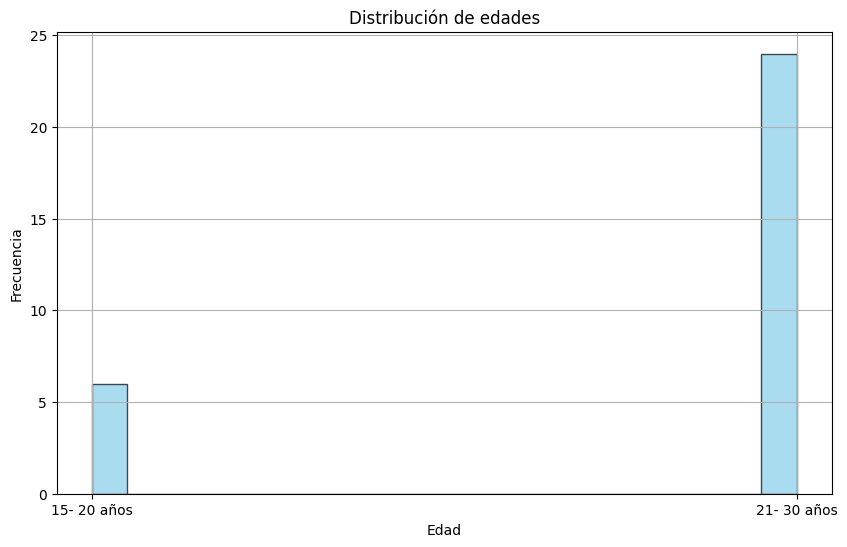

In [56]:
plt.figure(figsize=(10,6))
plt.hist(df_modified['rango_edad'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribución de edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

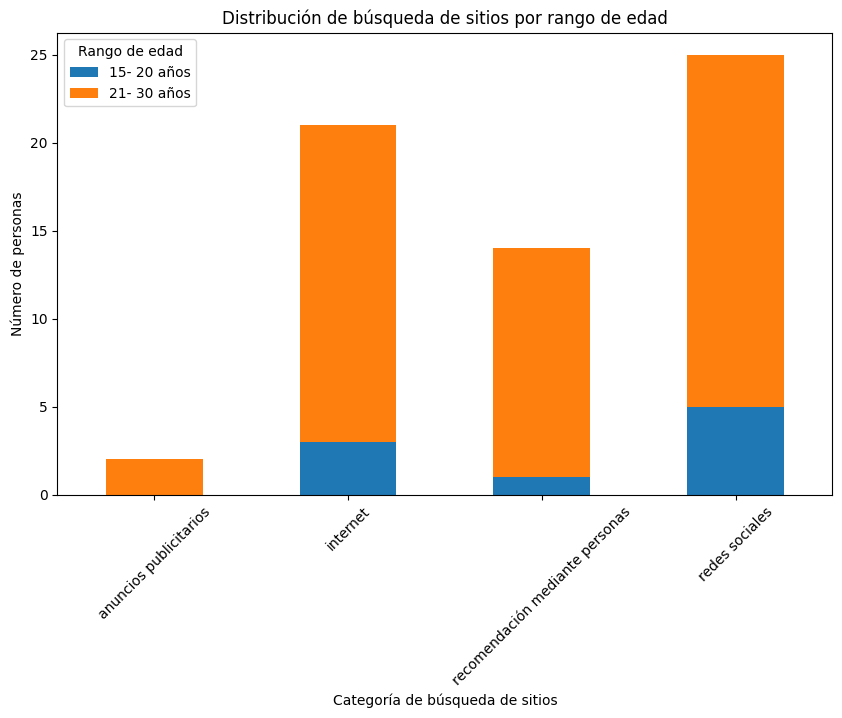

In [70]:
#1.1 con 11

# Dividir las respuestas múltiples en listas
df_modified['busqueda_de_sitios_split'] = df_modified['busqueda_de_sitios'].str.split(',')

# Expandir las filas para que cada opción seleccionada tenga su propia fila
df_exploded = df_modified.explode('busqueda_de_sitios_split')

# Limpiar los espacios en las respuestas y convertirlas a minúsculas
df_exploded['busqueda_de_sitios_split'] = df_exploded['busqueda_de_sitios_split'].str.strip().str.lower()

# Filtrar solo las categorías 
categorias = ['internet', 'redes sociales', 'recomendación mediante personas', 'anuncios publicitarios']
df_filtered = df_exploded[df_exploded['busqueda_de_sitios_split'].isin(categorias)]

# Crear un DataFrame de recuento por búsqueda de sitios y rango de edad
count_data = df_filtered.groupby(['busqueda_de_sitios_split', 'rango_edad']).size().reset_index(name='count')

# Pivotar para que cada rango de edad sea una columna
pivot_data = count_data.pivot(index='busqueda_de_sitios_split', columns='rango_edad', values='count').fillna(0)
pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Relación entre busqueda de sitios y rango de edad')
plt.ylabel('Número de personas')
plt.xlabel('Categoría de búsqueda de sitios')
plt.xticks(rotation=45)
plt.legend(title='Rango de edad')
plt.show()



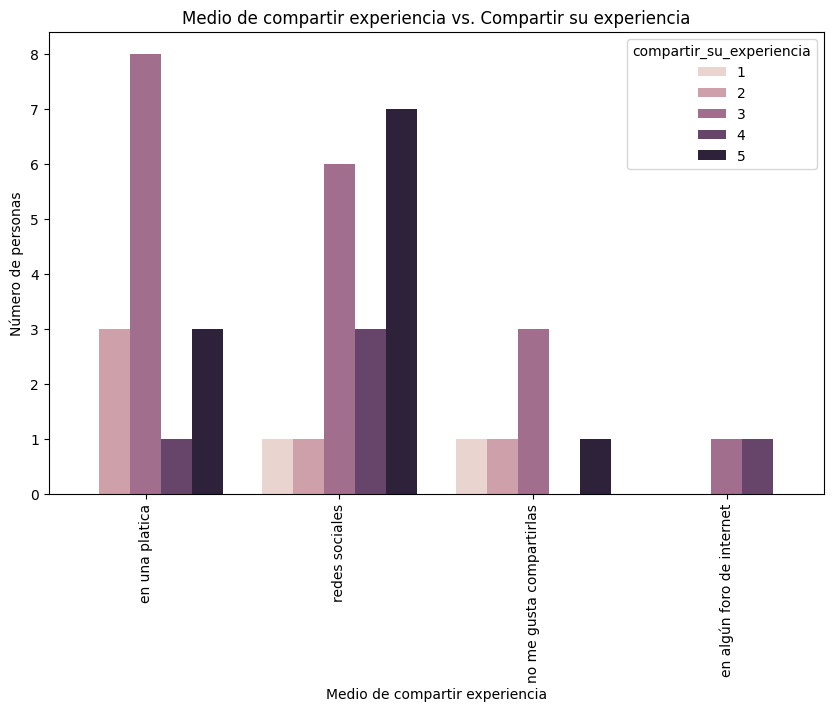

In [74]:
#10 y 16

df_modified['medio_compartir_experiencia_split'] = df_modified['medio_compartir_experiencia'].str.split(',')

df_exploded = df_modified.explode('medio_compartir_experiencia_split')

df_exploded['medio_compartir_experiencia_split'] = df_exploded['medio_compartir_experiencia_split'].str.strip().str.lower()

categorias = ['no me gusta compartirlas', 'redes sociales', 'en una platica', 'en algún foro de internet']
df_filtered = df_exploded[df_exploded['medio_compartir_experiencia_split'].isin(categorias)]

plt.figure(figsize=(10, 6))
sns.countplot(x='medio_compartir_experiencia_split', hue='compartir_su_experiencia', data=df_filtered)
plt.title('Medio de compartir experiencia vs. Compartir su experiencia')
plt.ylabel('Número de personas')
plt.xlabel('Medio de compartir experiencia')
plt.xticks(rotation=90)
plt.show()


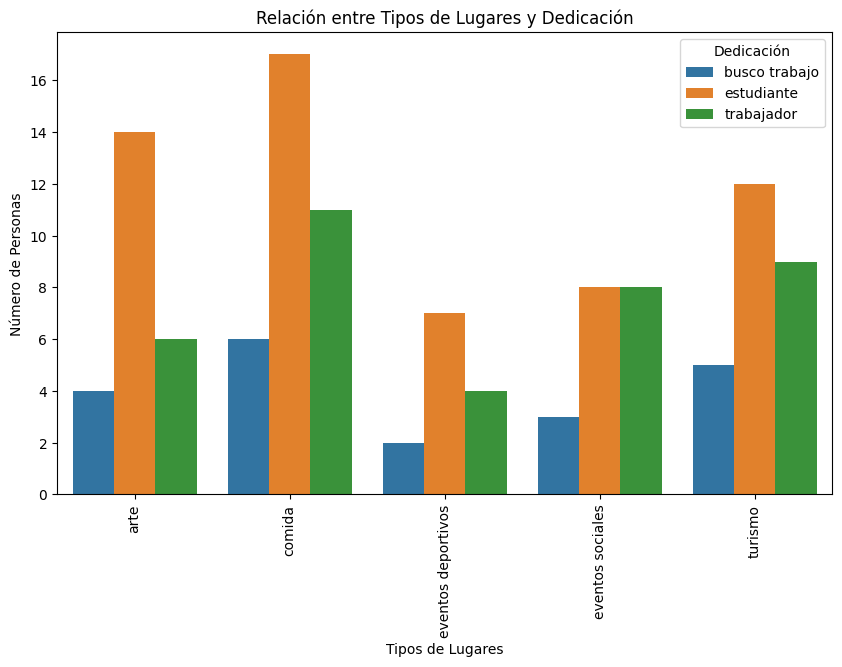

In [98]:
#pendiente
df_modified['tipos_lugares_split'] = df_modified['tipos_lugares'].str.split(',')
df_modified['dedicación_split'] = df_modified['dedicación'].str.split(',')

df_exploded = df_modified.explode('tipos_lugares_split')
df_exploded = df_exploded.explode('dedicación_split')

df_exploded['tipos_lugares_split'] = df_exploded['tipos_lugares_split'].str.strip().str.lower()
df_exploded['dedicación_split'] = df_exploded['dedicación_split'].str.strip().str.lower()

categorias_tipos_lugares = ['arte', 'turismo', 'comida', 'eventos deportivos', 'eventos sociales']
df_filtered = df_exploded[df_exploded['tipos_lugares_split'].isin(categorias_tipos_lugares)]

count_data = df_filtered.groupby(['tipos_lugares_split', 'dedicación_split']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.barplot(x='tipos_lugares_split', y='count', hue='dedicación_split', data=count_data)
plt.title('Relación entre Tipos de Lugares y Dedicación')
plt.ylabel('Número de Personas')
plt.xlabel('Tipos de Lugares')
plt.xticks(rotation=90)
plt.legend(title='Dedicación')
plt.show()





In [100]:
#3 y 4
df_modified['le_gusta_salir_split'] = df_modified['le_gusta_salir'].str.split(',')

df_exploded = df_modified.explode('le_gusta_salir_split')

df_exploded['le_gusta_salir_split'] = df_exploded['le_gusta_salir_split'].str.strip().str.lower()

categorias = [ 'mucho', 'a veces','no tanto', 'poco','muy poco']
df_filtered = df_exploded[df_exploded['le_gusta_salir_split'].isin(categorias)]

plt.figure(figsize=(10, 6))
sns.countplot(x='le_gusta_salir_split', hue='frecuencia_de_salida', data=df_filtered)
plt.title('Medio de compartir experiencia vs. Compartir su experiencia')
plt.ylabel('Número de personas')
plt.xlabel('Medio de compartir experiencia')
plt.xticks(rotation=90)
plt.show()


AttributeError: Can only use .str accessor with string values!

In [ ]:

#3 y 4
# 4 y 5
# 5 y 6 
# 2 y 8
# 12 y 14
# 16 y 17 
# 5 y 20 
#7 y 9
#13 y 15
# 19 y 20
# 18 y 16/17